<a href="https://colab.research.google.com/github/Prahaladha-Reddy/X_Sentiment/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/twitter_multi_class_sentiment.csv')

In [4]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [6]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [7]:
df['label']

,label
0,0
1,0
2,3
3,2
4,3
...,...
15995,0
15996,0
15997,1
15998,3


In [8]:
df['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [9]:
import matplotlib.pyplot as plt

In [10]:
lable_clounts=df['label_name'].value_counts(ascending=True)

Text(0.5, 1.0, 'Frequency of classes')

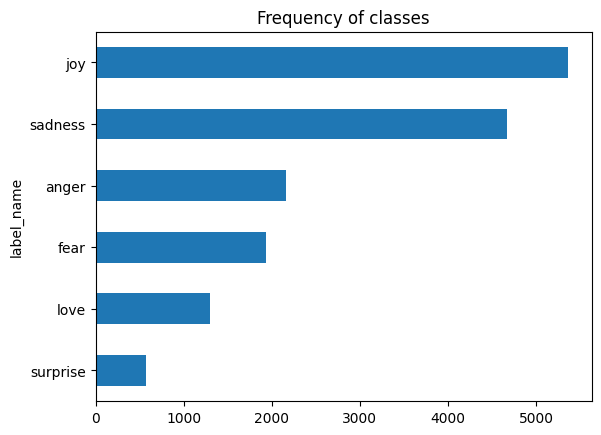

In [11]:
lable_clounts.plot.barh()
plt.title("Frequency of classes")

<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

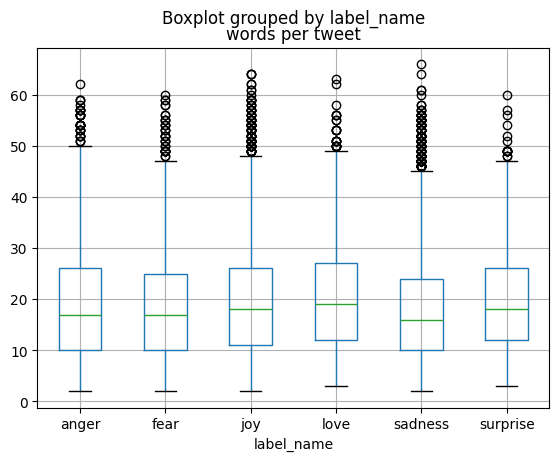

In [12]:
df['words per tweet']=df['text'].str.split().apply(len)
df.boxplot("words per tweet" , by='label_name')

In [13]:
df.head()

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [14]:
from transformers import AutoTokenizer
model_ckpt='bert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
text='I am fine tuning the bert model'
encoded=tokenizer(text)
print(encoded)

{'input_ids': [101, 1045, 2572, 2986, 17372, 1996, 14324, 2944, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train,test=train_test_split(df,test_size=0.3,stratify=df['label_name'])

In [18]:
test,validation=train_test_split(test,test_size=0.3,stratify=test['label_name'])

In [19]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [20]:
from datasets import Dataset,DatasetDict
dataset=DatasetDict(
  {
    'train':Dataset.from_pandas(train,preserve_index=False),
    'test':Dataset.from_pandas(test,preserve_index=False),
    'validation':Dataset.from_pandas(validation,preserve_index=False)
  }
)

In [21]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 3360
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 1440
    })
})

In [22]:
def tokenize(batch):
  temp=tokenizer(batch['text'],padding=True,truncation=True)
  return temp

In [23]:
emotion_encoded=dataset.map(tokenize,batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3360 [00:00<?, ? examples/s]

Map:   0%|          | 0/1440 [00:00<?, ? examples/s]

In [24]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3360
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1440
    })
})

In [25]:
label2id={x['label_name']:x['label'] for x in dataset['train']}
id2label={v:k for k,v in label2id.items()}



In [26]:
label2id,id2label

({'love': 2, 'joy': 1, 'anger': 3, 'fear': 4, 'sadness': 0, 'surprise': 5},
 {2: 'love', 1: 'joy', 3: 'anger', 4: 'fear', 0: 'sadness', 5: 'surprise'})

In [27]:
from transformers import AutoModel

In [28]:
import torch

In [29]:
model=AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [30]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [31]:
from transformers import AutoModelForSequenceClassification,AutoConfig

In [33]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [34]:
numlabes=len(label2id)
config=AutoConfig.from_pretrained(model_ckpt,num_labels=numlabes,id2label=id2label,label2id=label2id)

In [35]:
model=AutoModelForSequenceClassification.from_pretrained(model_ckpt,config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [37]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [38]:
from transformers import TrainingArguments,Trainer

In [42]:
batch_size=64
training_dir='bert_base_train_dir'

training_args=TrainingArguments(
    output_dir=training_dir,
  num_train_epochs=2,
  learning_rate=2e-5,
  per_device_train_batch_size=batch_size,
  per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
  load_best_model_at_end=True,
    disable_tqdm=False,
  eval_strategy='epoch',
  save_strategy='epoch',
    )

In [43]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00


In [44]:
import numpy as np

In [45]:
import evaluate

In [47]:
accuracy=evaluate.load('accuracy')

In [48]:
def compute_metrices(eval_pred):
  predictions,labels=eval_pred
  predictions=np.argmax(predictions,axis=1)
  acc=accuracy.compute(predictions=predictions,references=labels)

In [49]:
from sklearn.metrics import accuracy_score,f1_score

def compute_metrices(pred):
  labels=pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1=f1_score(labels,preds,average='weighted')
  acc=accuracy_score(labels,preds)
  return {'accuracy':acc,'f1':f1}


In [50]:
from transformers import Trainer



In [51]:
trainer=Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrices,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    tokenizer=tokenizer
)

<ipython-input-51-76cfc82e165b>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(


In [52]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.495444,0.866667,0.858682
2,No log,0.295361,0.915278,0.914505


TrainOutput(global_step=350, training_loss=0.7362409319196429, metrics={'train_runtime': 469.8894, 'train_samples_per_second': 47.671, 'train_steps_per_second': 0.745, 'total_flos': 655301617284096.0, 'train_loss': 0.7362409319196429, 'epoch': 2.0})

In [53]:
preds_outputs=trainer.predict(emotion_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.3220057785511017,
 'test_accuracy': 0.8869047619047619,
 'test_f1': 0.8862035343217496,
 'test_runtime': 11.0963,
 'test_samples_per_second': 302.803,
 'test_steps_per_second': 4.776}

In [54]:
preds_outputs.predictions

array([[-1.25993752e+00,  3.96205497e+00, -5.98150422e-04,
        -1.17255735e+00, -1.30155265e+00, -8.84255290e-01],
       [ 4.20013046e+00, -8.60107005e-01, -1.09434998e+00,
         7.69907296e-01, -7.68435180e-01, -1.66733289e+00],
       [-8.38629484e-01, -8.22590828e-01, -1.15101051e+00,
         2.84358203e-01,  3.52031875e+00, -1.07501894e-01],
       ...,
       [-1.16530168e+00,  3.90156603e+00,  2.10324638e-02,
        -1.10343599e+00, -1.03622591e+00, -9.56753314e-01],
       [ 3.86713409e+00, -5.32583892e-01,  1.13671750e-01,
        -9.85106826e-01, -7.12562501e-01, -1.19552100e+00],
       [-1.15383863e+00, -9.59276259e-01, -1.42160094e+00,
         1.18158305e+00,  3.17898369e+00, -5.92975703e-04]], dtype=float32)

In [55]:
y_pred=np.argmax(preds_outputs.predictions,axis=1)

In [56]:
y_true=emotion_encoded['test']['label']

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.92      0.92      1126
           2       0.78      0.73      0.75       274
           3       0.85      0.90      0.87       453
           4       0.86      0.85      0.85       407
           5       0.81      0.70      0.75       120

    accuracy                           0.89      3360
   macro avg       0.85      0.84      0.84      3360
weighted avg       0.89      0.89      0.89      3360



In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [62]:
cs=confusion_matrix(y_true,y_pred)

Text(50.722222222222214, 0.5, 'True')

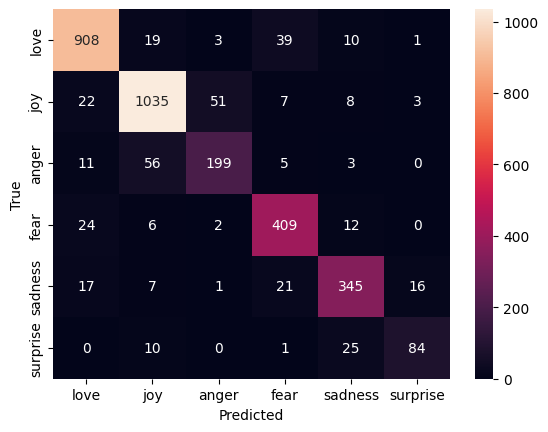

In [64]:
sns.heatmap(cs,annot=True,fmt='g',xticklabels=id2label.values(),yticklabels=id2label.values())
plt.xlabel('Predicted')
plt.ylabel('True')


In [67]:
test="I am in scared of meth"

In [68]:
inputs=tokenizer(test,return_tensors='pt').to(device)

In [69]:
with torch.no_grad():
  logits=model(**inputs).logits

In [71]:
pred=torch.argmax(logits,axis=1)

In [72]:
pred,id2label[pred.item()]

(tensor([4], device='cuda:0'), 'fear')

In [75]:
def get_prediction(text):
  inputs=tokenizer(text,return_tensors='pt').to(device)
  with torch.no_grad():
    logits=model(**inputs).logits
  pred=torch.argmax(logits,axis=1)
  return id2label[pred.item()]

In [76]:
get_prediction("I am in scared of meth")

'fear'

In [77]:
trainer.save_model('bert_base_model')

In [78]:
from transformers import pipeline

In [79]:
classifier=pipeline('text-classification',model='bert_base_model')
classifier('A fear of unbearable love')

Device set to use cuda:0


[{'label': 'sadness', 'score': 0.7839043736457825}]